In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import t 

file_path = "D:\Analisis data eksploratif\Orange Quality Data.csv"  # Sesuaikan dengan lokasi file
orange_data = pd.read_csv(file_path)

orange_data.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [2]:
X = orange_data[["Ripeness (1-5)", "Softness (1-5)", "Brix (Sweetness)", "pH (Acidity)"]]
y = orange_data["Quality (1-5)"]
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

Shape X: (241, 4)
Shape y: (241,)


In [3]:
X = np.column_stack((np.ones(X.shape[0]), X)) 

In [4]:
model = LinearRegression(fit_intercept=False)  # Intercept sudah ditambahkan manual
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [5]:
coef = model.coef_

In [6]:
y_pred = model.predict(X)

In [7]:
# Uji Signifikansi Koefisien Regresi

n = X.shape[0]  
p = X.shape[1] + 1 
df = n - p 

residuals = y - y_pred
residual_std_error = np.sqrt(np.sum(residuals**2) / (n - p))

# Matriks kovarian
X_inv = np.linalg.inv(X.T @ X)  # Inverse dari matriks X'X
se = np.sqrt(np.diagonal(X_inv)) * residual_std_error  # Standard error untuk setiap koefisien

# Hitung statistik t dan p-value
t_values = coef / se  # Statistik T
p_values = [2 * (1 - t.cdf(np.abs(t_val), df=n - p)) for t_val in t_values]  # P-value

# Tampilkan hasil
result = pd.DataFrame({
    "Variable": ["Intercept"] + list(orange_data[["Ripeness (1-5)", "Softness (1-5)", "Brix (Sweetness)", "pH (Acidity)"]].columns),  # Nama variabel
    "Coefficient": coef,
    "Standard Error": se,
    "T-Statistic": t_values,
    "P-Value": p_values
})

print(result)

           Variable  Coefficient  Standard Error  T-Statistic   P-Value
0         Intercept     1.973612        0.577290     3.418752  0.000741
1    Ripeness (1-5)     0.141562        0.042396     3.339074  0.000977
2    Softness (1-5)    -0.029590        0.041608    -0.711176  0.477680
3  Brix (Sweetness)     0.207182        0.019407    10.675883  0.000000
4      pH (Acidity)    -0.240290        0.129628    -1.853693  0.065036


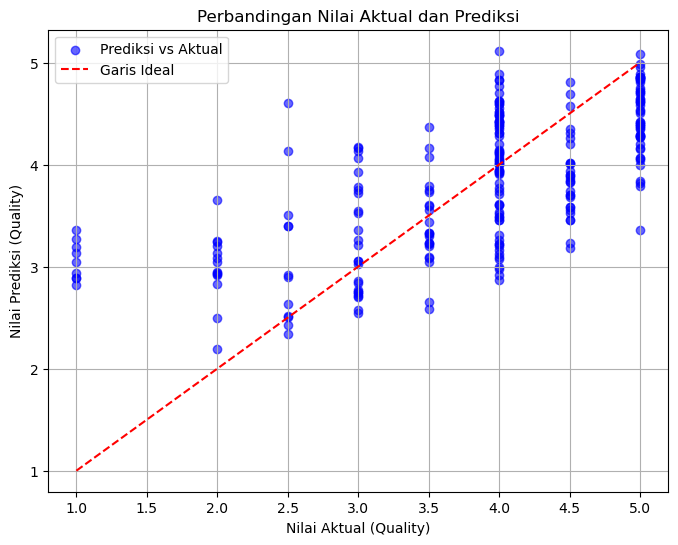

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label="Prediksi vs Aktual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Garis Ideal")
plt.xlabel("Nilai Aktual (Quality)")
plt.ylabel("Nilai Prediksi (Quality)")
plt.title("Perbandingan Nilai Aktual dan Prediksi")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#Uji Multikolinearitas 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pilih variabel independen
X = orange_data[["Ripeness (1-5)", "Softness (1-5)", "Brix (Sweetness)", "pH (Acidity)"]]

# Tambahkan konstanta untuk perhitungan VIF
X_with_const = sm.add_constant(X)

# Hitung VIF untuk setiap variabel independen
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("Hasil Uji Multikolinearitas (VIF):")
print(vif_data)

Hasil Uji Multikolinearitas (VIF):
           Variable         VIF
0             const  138.190768
1    Ripeness (1-5)    1.078088
2    Softness (1-5)    1.252470
3  Brix (Sweetness)    1.185056
4      pH (Acidity)    1.229872


In [10]:
# Uji Signifikansi
alpha = 0.05  # Tingkat signifikansi 5%
result["Significant"] = result["P-Value"] < alpha

print("\nHasil Uji Signifikansi:")
print(result)

print("\nInterpretasi Signifikansi:")
for index, row in result.iterrows():
    if row["Significant"]:
        print(f"Koefisien '{row['Variable']}' signifikan secara statistik (p-value = {row['P-Value']:.5f}).")
    else:
        print(f"Koefisien '{row['Variable']}' tidak signifikan secara statistik (p-value = {row['P-Value']:.5f}).")


Hasil Uji Signifikansi:
           Variable  Coefficient  Standard Error  T-Statistic   P-Value  \
0         Intercept     1.973612        0.577290     3.418752  0.000741   
1    Ripeness (1-5)     0.141562        0.042396     3.339074  0.000977   
2    Softness (1-5)    -0.029590        0.041608    -0.711176  0.477680   
3  Brix (Sweetness)     0.207182        0.019407    10.675883  0.000000   
4      pH (Acidity)    -0.240290        0.129628    -1.853693  0.065036   

   Significant  
0         True  
1         True  
2        False  
3         True  
4        False  

Interpretasi Signifikansi:
Koefisien 'Intercept' signifikan secara statistik (p-value = 0.00074).
Koefisien 'Ripeness (1-5)' signifikan secara statistik (p-value = 0.00098).
Koefisien 'Softness (1-5)' tidak signifikan secara statistik (p-value = 0.47768).
Koefisien 'Brix (Sweetness)' signifikan secara statistik (p-value = 0.00000).
Koefisien 'pH (Acidity)' tidak signifikan secara statistik (p-value = 0.06504).


In [11]:
#Uji Hipotesis dan Keputusan

# Hitung standard error untuk intercept
se_intercept = np.sqrt(X_inv[0, 0]) * residual_std_error

# Hitung t-statistik dan p-value untuk intercept
intercept_t_value = model.intercept_ / se_intercept
intercept_p_value = 2 * (1 - t.cdf(np.abs(intercept_t_value), df))

# Hasil
print(f"Intercept:")
print(f" - Nilai Intercept: {model.intercept_:.4f}")
print(f" - Nilai t-Statistik: {intercept_t_value:.4f}")
print(f" - Nilai P-Value: {intercept_p_value:.4f}")

# Keputusan hipotesis
alpha = 0.05
if intercept_p_value < alpha:
    print("Keputusan: Intercept signifikan pada tingkat signifikansi 5%.")
else:
    print("Keputusan: Intercept tidak signifikan pada tingkat signifikansi 5%.")

# Keputusan hipotesis
alpha = 0.05  
print("Keputusan Hipotesis untuk Koefisien:")
for i, (coef_val, t_val, p_val) in enumerate(zip(model.coef_, t_values, p_values)):
    print(f"Koefisien {i + 1}:")
    print(f" - Nilai Koefisien: {coef_val:.4f}")
    print(f" - Nilai t-Statistik: {t_val:.4f}")
    print(f" - Nilai P-Value: {p_val:.4f}")
    if p_val < alpha:
        print("   -> Keputusan: Tolak H0 (koefisien signifikan)")
    else:
        print("   -> Keputusan: Gagal Tolak H0 (koefisien tidak signifikan)")

# Keputusan untuk intercept
print("\nKeputusan Hipotesis untuk Intercept:")
print(f"Intercept:")
print(f" - Nilai Intercept: {model.intercept_:.4f}")
print(f" - Nilai t-Statistik: {intercept_t_value:.4f}")
print(f" - Nilai P-Value: {intercept_p_value:.4f}")
if intercept_p_value < alpha:
    print("   -> Keputusan: Tolak H0 (intercept signifikan)")
else:
    print("   -> Keputusan: Gagal Tolak H0 (intercept tidak signifikan)")

Intercept:
 - Nilai Intercept: 0.0000
 - Nilai t-Statistik: 0.0000
 - Nilai P-Value: 1.0000
Keputusan: Intercept tidak signifikan pada tingkat signifikansi 5%.
Keputusan Hipotesis untuk Koefisien:
Koefisien 1:
 - Nilai Koefisien: 1.9736
 - Nilai t-Statistik: 3.4188
 - Nilai P-Value: 0.0007
   -> Keputusan: Tolak H0 (koefisien signifikan)
Koefisien 2:
 - Nilai Koefisien: 0.1416
 - Nilai t-Statistik: 3.3391
 - Nilai P-Value: 0.0010
   -> Keputusan: Tolak H0 (koefisien signifikan)
Koefisien 3:
 - Nilai Koefisien: -0.0296
 - Nilai t-Statistik: -0.7112
 - Nilai P-Value: 0.4777
   -> Keputusan: Gagal Tolak H0 (koefisien tidak signifikan)
Koefisien 4:
 - Nilai Koefisien: 0.2072
 - Nilai t-Statistik: 10.6759
 - Nilai P-Value: 0.0000
   -> Keputusan: Tolak H0 (koefisien signifikan)
Koefisien 5:
 - Nilai Koefisien: -0.2403
 - Nilai t-Statistik: -1.8537
 - Nilai P-Value: 0.0650
   -> Keputusan: Gagal Tolak H0 (koefisien tidak signifikan)

Keputusan Hipotesis untuk Intercept:
Intercept:
 - Nilai I

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Hitung MSE
mse = mean_squared_error(y, y_pred)

# Hitung RMSE
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.5667
Root Mean Squared Error (RMSE): 0.7528


### TIPE METODE REGRESI ###

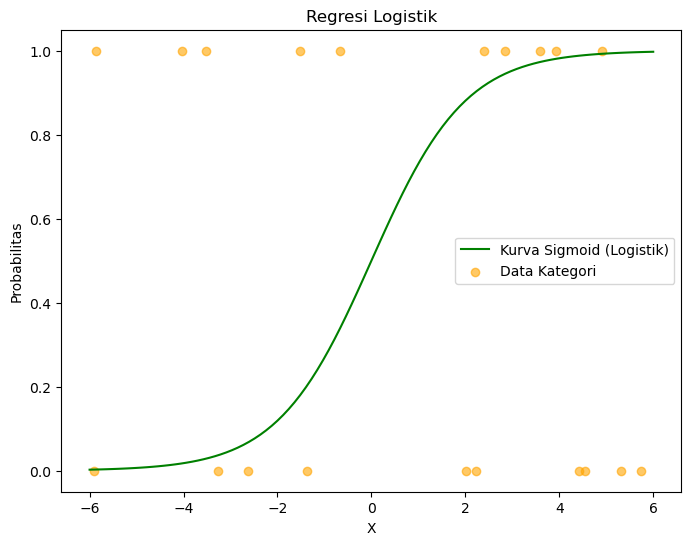

In [13]:
#Regresi Logistik

from scipy.special import expit

# Data simulasi
X = np.linspace(-6, 6, 100)
y = expit(X) 

# Plot
plt.figure(figsize=(8, 6))
plt.plot(X, y, label="Kurva Sigmoid (Logistik)", color="green")
plt.scatter(np.random.uniform(-6, 6, 20), np.random.randint(0, 2, 20), alpha=0.6, label="Data Kategori", color="orange")
plt.title("Regresi Logistik")
plt.xlabel("X")
plt.ylabel("Probabilitas")
plt.legend()
plt.show()

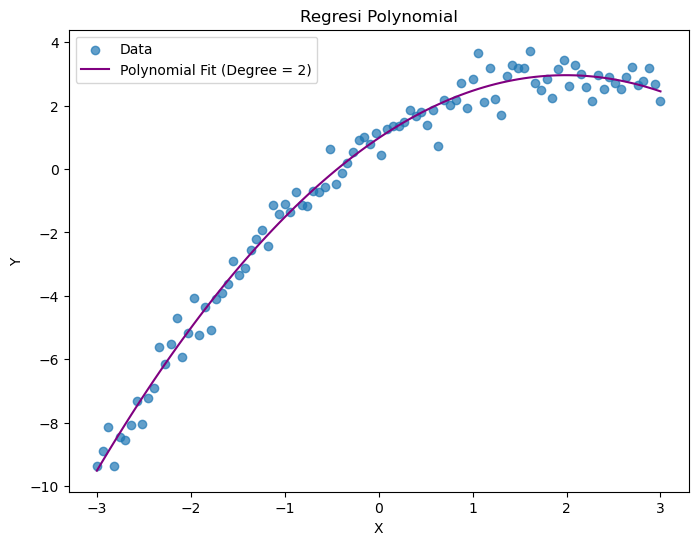

In [14]:
# Regresi Polynomial

from numpy.polynomial.polynomial import Polynomial

# Data simulasi
X = np.linspace(-3, 3, 100)
y = 1 + 2 * X - 0.5 * X**2 + np.random.normal(0, 0.5, 100)

# Polynomial fitting
p = Polynomial.fit(X, y, deg=2)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Data")
plt.plot(*p.linspace(), color="purple", label=f"Polynomial Fit (Degree = 2)")
plt.title("Regresi Polynomial")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

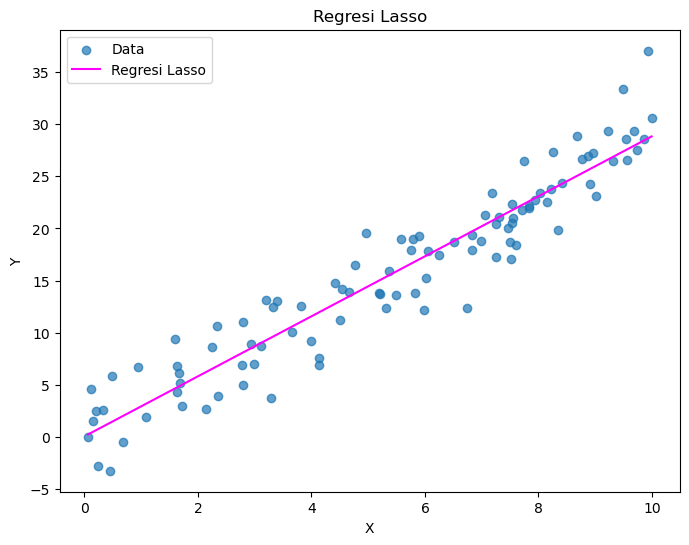

In [15]:
# Regresi Lasso

from sklearn.linear_model import Lasso

# Data simulasi
X = np.random.rand(100, 1) * 10
y = 3 * X[:, 0] + np.random.normal(0, 3, 100)

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(np.sort(X[:, 0]), lasso.predict(np.sort(X, axis=0)), color="magenta", label="Regresi Lasso")
plt.title("Regresi Lasso")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [16]:
# Membuat model regresi linier dengan OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan hasil model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              4122.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                    1.71e-82
Time:                        17:02:23   Log-Likelihood:                         -243.36
No. Observations:                 100   AIC:                                      488.7
Df Residuals:                      99   BIC:                                      491.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------